In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\mohanan\Videos\apple_quality.csv")

In [3]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [4]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3999.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076230
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110136
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377510
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022421
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.509737
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      3999 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [6]:
data.shape

(4000, 9)

In [7]:
#Changing Datatype of acidity from object to float
data['Acidity']=pd.to_numeric(data['Acidity'],errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      3999 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


Missing value handling

In [9]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        1
Quality        0
dtype: int64

In [10]:
data['Acidity']=data['Acidity'].fillna(data['Acidity'].mean())

In [11]:
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [12]:
data['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [13]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [14]:
# Dropping irrelevant column
data.drop('A_id',axis=1,inplace=True)

In [15]:
data.shape

(4000, 8)

Visualization

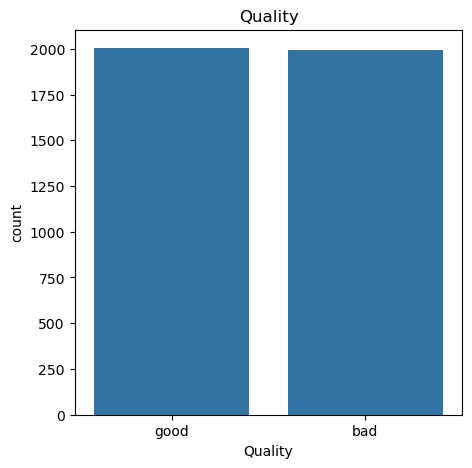

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Quality'],data=data)
plt.title("Quality")
plt.tight_layout
plt.show()

The dataset is balanced, with nearly equal numbers of "good" and "bad" apples.
Each category ("good" and "bad") has around 2000 samples.

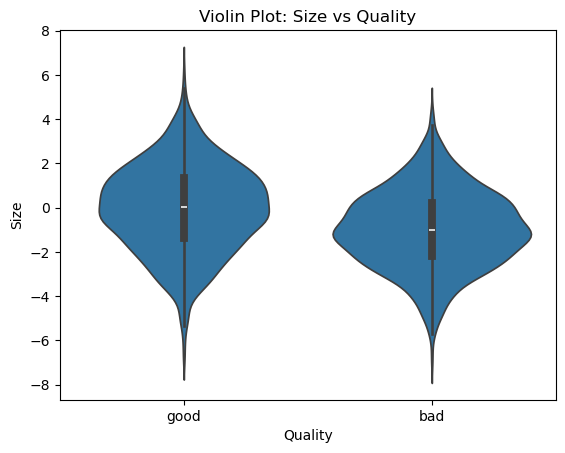

In [17]:
sns.violinplot(x='Quality', y='Size', data=data)
plt.title('Violin Plot: Size vs Quality')
plt.show()


Insight:Size doesnot appear to be strong distinguishing factor between good and bad apple
Violin plot shows size distribution is quite alike

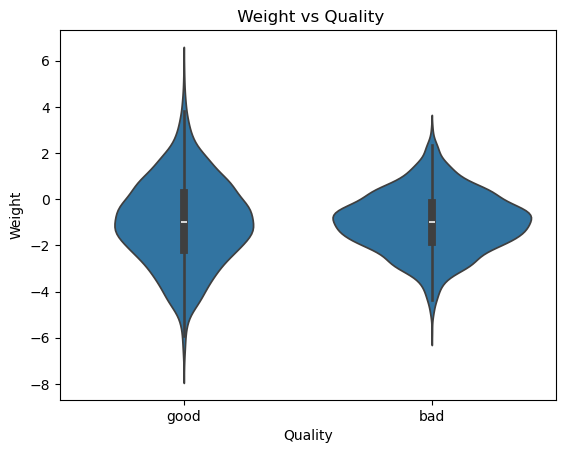

In [19]:
sns.violinplot(x='Quality', y='Weight', data=data)
plt.title(' Weight vs Quality')
plt.show()

Insight: The median weight for good quality and bad apples is quite same  
The violin for good apples is slightly more spread out.

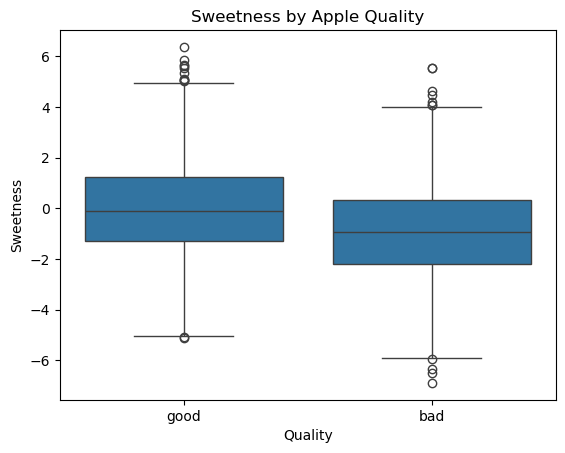

In [19]:
# Feature Vs Quality
sns.boxplot(x='Quality', y='Sweetness', data=data)
plt.title("Sweetness by Apple Quality")
plt.show()

Good apples tend to be slightly sweeter:
The median sweetness for good apples is higher than for bad apples.
This suggests sweetness positively contributes to apple quality.
Bad apples have a wider spread in sweetness:
The interquartile range (IQR) and whiskers are longer for bad apples.
This indicates inconsistent sweetness in bad apples.
Outliers exist in both categories:
Good apples have more high-sweetness outliers, possibly very sweet apples.
Bad apples have more low-sweetness outliers, which might hurt their quality.

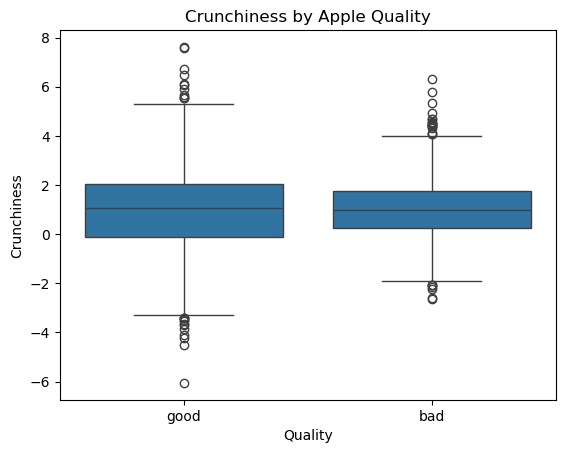

In [20]:
sns.boxplot(x='Quality', y='Crunchiness', data=data)
plt.title("Crunchiness by Apple Quality")
plt.show()

Good and bad apples have similar crunchiness medians:
The median crunchiness is almost the same for both groups.
So crunchiness may not be a strong differentiator of quality on its own.
Good apples show wider crunchiness variability:
The interquartile range (IQR) is slightly larger for good apples.
This suggests good apples can vary more in crunchiness, yet still be high quality.
More extreme low outliers for good apples:
Surprisingly, some good apples are not crunchy at all (even negative values).
This might imply crunchiness is not essential for an apple to be considered good.

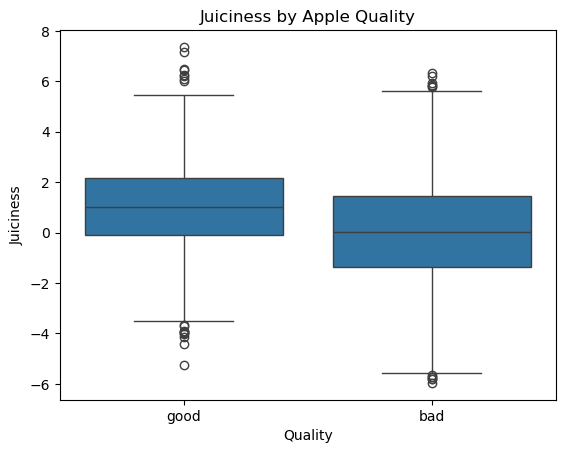

In [21]:
sns.boxplot(x='Quality', y='Juiciness', data=data)
plt.title("Juiciness by Apple Quality")
plt.show()

Good apples tend to be juicier:
The median juiciness is higher for good apples.
Good-quality apples have more samples above 0 in juiciness, showing a positive tendency.
Bad apples lean toward dryness:
The lower quartile of bad apples extends into negative juiciness (less juicy or dry).
This suggests that low juiciness could be a sign of bad quality.
Some overlap exists:
There's a significant range of values where juiciness overlaps for both good and bad apples.
This means juiciness alone isn't enough to fully predict quality, but it adds value when combined with other features.
Mild outliers on both sides:
Both quality types have a few outliers, but they’re not extreme.
These can be kept if they reflect natural variation in fruit characteristics.



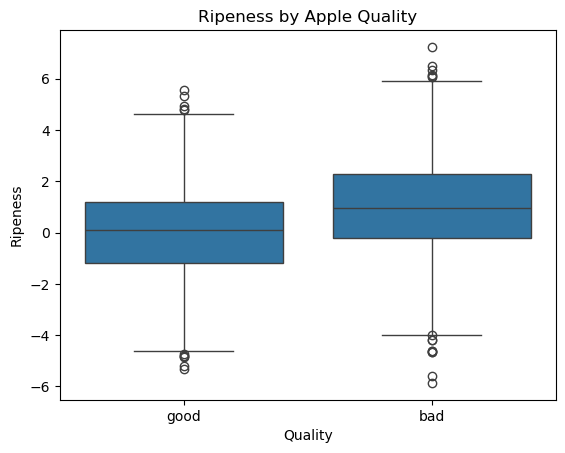

In [22]:
sns.boxplot(x='Quality', y='Ripeness', data=data)
plt.title("Ripeness by Apple Quality")
plt.show()

This suggests that bad apples tend to be more ripe or even overripe compared to good apples.
Bad apples show a wider IQR, meaning there's more variation in ripeness among them.
Good apples are more tightly distributed in ripeness.
Both groups contain outliers on both ends:
Good apples have a few underripe outliers (ripeness < -4).
Bad apples have both underripe and overripe outliers.
Bad apples are more skewed and less consistent in ripeness.
Good apples seem to have a narrower, more balanced ripeness range.

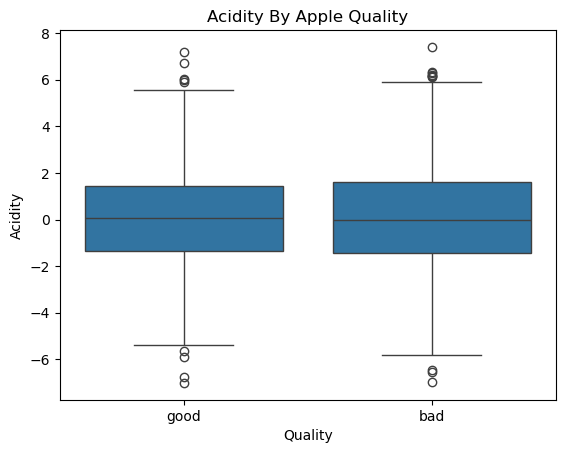

In [23]:
sns.boxplot(x='Quality',y='Acidity',data=data)
plt.title('Acidity By Apple Quality')
plt.show()

Insight:Both good and bad apples have similar median acidity level around 0
The middle 50% of values is nearly the same both good and bad apples
Both quality categories have several outliers on both high and low ends but which is not too far

Defining Dependant and independant Variables

In [24]:
# Encoding Dependent variable
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
data['Quality']=Le.fit_transform(data['Quality'])

In [25]:
data.Quality

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int32

In [26]:
X=data.drop(['Quality'],axis=1)
y=data['Quality']

In [27]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [28]:
X.Acidity

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X=Sc.fit_transform(X)

In [30]:
X=pd.DataFrame(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [32]:
from sklearn.linear_model import LogisticRegression
Lr= LogisticRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)

In [33]:
y_pred[:5]

array([1, 0, 0, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

In [35]:
print("Accuracy_Score:",accuracy_score(y_pred,y_test) )
print("Precision_Score:",precision_score(y_pred,y_test))
print("f1_Score:",f1_score(y_pred,y_test))
print("recall_Score:",recall_score(y_pred,y_test))

Accuracy_Score: 0.751
Precision_Score: 0.7655310621242485
f1_Score: 0.7541954590325765
recall_Score: 0.7431906614785992


In [36]:
print("Confusion matrix",'\n',confusion_matrix(y_pred,y_test))

Confusion matrix 
 [[369 117]
 [132 382]]


In [37]:
from sklearn.neighbors import KNeighborsClassifier
acc_value=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    acc=accuracy_score(knn_pred,y_test)
    acc_value.append(acc)

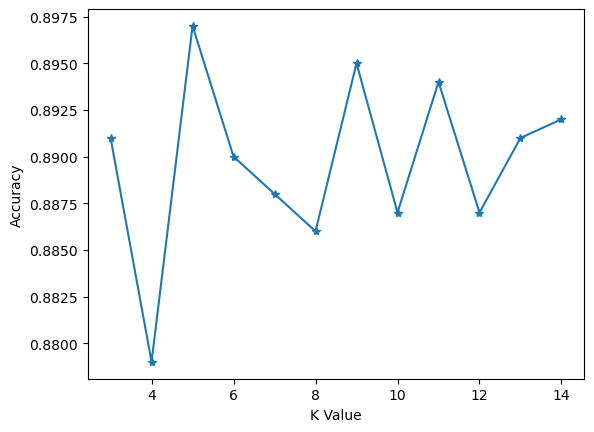

In [38]:
plt.plot(neighbors,acc_value,'*-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

we can see the highest accuracy is when K=5

In [39]:
#Building a model using Knn where k=5
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

In [40]:
print("Accuracy_Score:",accuracy_score(knn_pred,y_test) )
print("Precision_Score:",precision_score(knn_pred,y_test))
print("f1_Score:",f1_score(knn_pred,y_test))
print("recall_Score:",recall_score(knn_pred,y_test))

Accuracy_Score: 0.897
Precision_Score: 0.8957915831663327
f1_Score: 0.8966900702106319
recall_Score: 0.8975903614457831


In [41]:
print('ConfusionMatrix:','\n',confusion_matrix(knn_pred,y_test))

ConfusionMatrix: 
 [[450  52]
 [ 51 447]]


In [42]:
# svm 
from sklearn.svm import SVC
Sv=SVC(kernel='linear')
Sv.fit(X_train,y_train)
Sv_pred=Sv.predict(X_test)

In [43]:
print("Accuracy_Score:",accuracy_score(Sv_pred,y_test) )
print("Precision_Score:",precision_score(Sv_pred,y_test))
print("f1_Score:",f1_score(Sv_pred,y_test))
print("recall_Score:",recall_score(Sv_pred,y_test))

Accuracy_Score: 0.748
Precision_Score: 0.7695390781563126
f1_Score: 0.7529411764705882
recall_Score: 0.7370441458733206


In [44]:
print("Confusion Matrix",'\n',confusion_matrix(Sv_pred,y_test))

Confusion Matrix 
 [[364 115]
 [137 384]]


In [45]:
#Decisin Tree
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)
Dt_pred=Dt.predict(X_test)

In [46]:
print("Accuracy_Score:",accuracy_score(Dt_pred,y_test) )
print("Precision_Score:",precision_score(Dt_pred,y_test))
print("f1_Score:",f1_score(Dt_pred,y_test))
print("recall_Score:",recall_score(Dt_pred,y_test))

Accuracy_Score: 0.796
Precision_Score: 0.8276553106212425
f1_Score: 0.8019417475728156
recall_Score: 0.7777777777777778


In [47]:
print('Confusion Matrix','\n',confusion_matrix(Dt_pred,y_test))

Confusion Matrix 
 [[383  86]
 [118 413]]


In [48]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train)
Rf_pred=Rf.predict(X_test)

In [49]:
print("Accuracy_Score:",accuracy_score(Rf_pred,y_test) )
print("Precision_Score:",precision_score(Rf_pred,y_test))
print("f1_Score:",f1_score(Rf_pred,y_test))
print("recall_Score:",recall_score(Rf_pred,y_test))

Accuracy_Score: 0.894
Precision_Score: 0.9038076152304609
f1_Score: 0.8948412698412699
recall_Score: 0.8860510805500982


In [50]:
print('Confusion matrix','\n',confusion_matrix(Rf_pred,y_test))

Confusion matrix 
 [[443  48]
 [ 58 451]]


From Modeling we can see that Random forest Model gave maximum accuracy 

Checking with sample data

In [51]:
test_data=[[-3.970049,-2.511236,5.346330,-1.012009,1.844900,0.329840,-0.49759]]

In [52]:
test_data=pd.DataFrame(test_data)

In [53]:
test_data.shape

(1, 7)

In [54]:
#test_data1=test_data.transpose()

In [55]:
test_rf_pred=Rf.predict(test_data)

In [56]:
test_rf_pred

array([1])

Best Performing Models
KNN and Random Forest have the highest accuracy and balanced metrics across the board.
Between them, Random Forest is slightly better with higher precision and more robustness (less sensitive to noisy data).
Logistic Regression and SVM
Lower performance overall — especially recall for SVM (73%) and logistic regression (74%).
These models are linear and may not handle complex patterns or feature interactions well without feature engineering or transformation.
Decision Tree
A good baseline: F1 score is 80%, which is strong.
Slightly overfits compared to Random Forest, but still decent.



Conclusion:The aim of this project was to predict the quality of apples (good or bad) based on their physical and taste-related attributes such as size, weight, sweetness, crunchiness, juiciness, ripeness, and acidity.
Boxplots revealed key differences in features like ripeness, juiciness, and crunchiness between good and bad apples.
Outliers were observed in most numeric columns. some  were retained where they represented natural variations.
EDA suggested that features like ripeness, sweetness, and juiciness have noticeable influence on apple quality.
Random Forest was the top-performing model, showing high accuracy and balanced precision-recall.